**AI&DA18 Batch 1 Lab Exam Name: Atharva M. Kulkarni GR No: 11810384**

Q2: Write a Python Program to Implement Following
Operations on Gray Scale Version of Image2:
1. Plot a Histogram
2. Apply Histogram Equalization. HistSize Should be 10, and Range Should
be Entire Gray Scale for 8-bit Image
3. Again, Apply Histogram Equalization on Equalized Image Obtained in
Step 3 with Same Parameters as Mentioned in Step 3.
4. Compare Equalization Results Obtained in Step3 and Step4
5. Comment on Histogram Matching

In [1]:
import cv2
from google.colab.patches import cv2_imshow
import re
import os
from google.colab import drive
import matplotlib.pylab as plt
from matplotlib.pyplot import figure
from skimage import exposure
from skimage.exposure import match_histograms
drive.mount('/content/drive')

Mounted at /content/drive


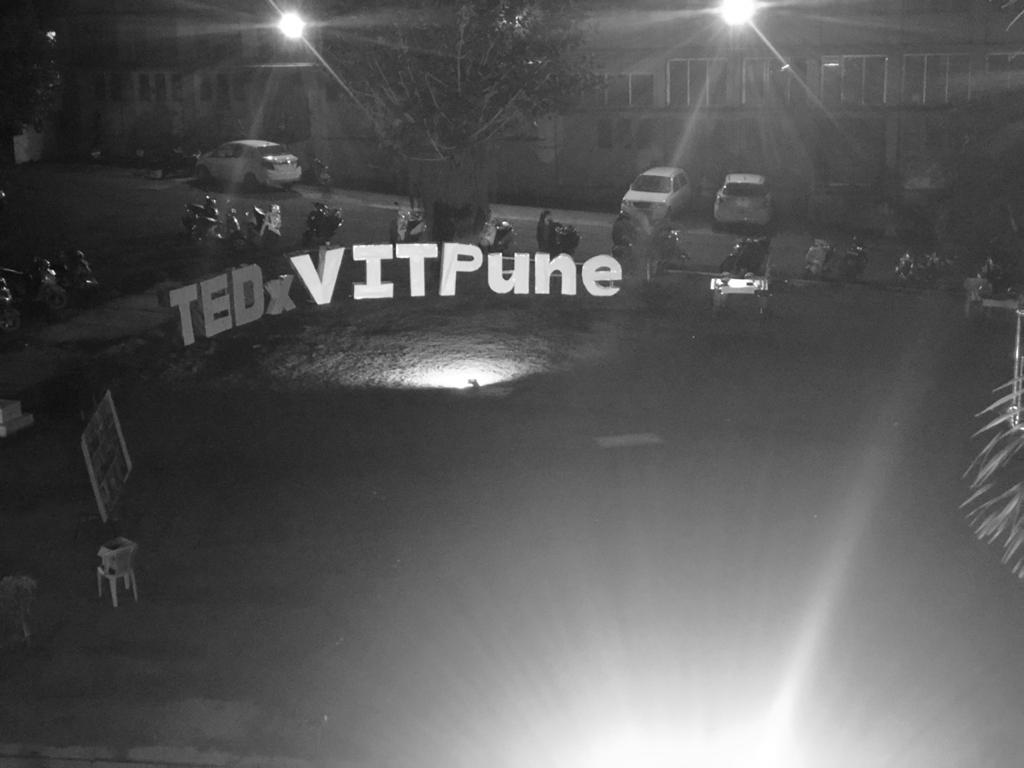

In [2]:
img = cv2.imread('/content/drive/MyDrive/WhatsApp Image 2021-10-09 at 11.01.02.jpeg', cv2.IMREAD_GRAYSCALE)
cv2_imshow(img)

**Histogram: Original Image**

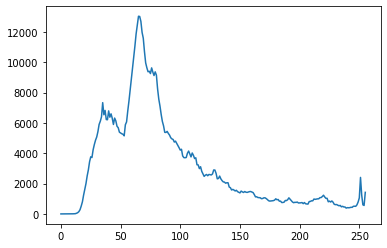

In [3]:
orig_hist = cv2.calcHist([img],[0],None,[256],[0,256])
plt.plot(orig_hist)

**Histogram Equalization: Iteration I**

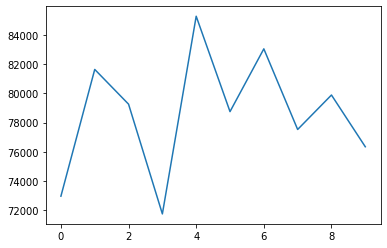

In [ ]:
hist_eq_1 = cv2.equalizeHist(img)
hist_eq_1_plot = cv2.calcHist([hist_eq_1],[0],None,[10],[0,256])
plt.plot(hist_eq_1_plot)

**Histogram Equalization: Iteration II**

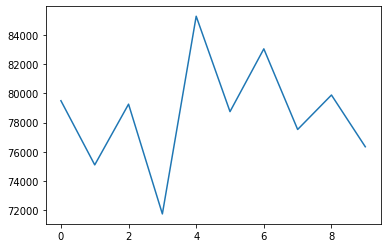

In [ ]:
hist_eq_2 = cv2.equalizeHist(hist_eq_1)
hist_eq_2_plot = cv2.calcHist([hist_eq_2],[0],None,[10],[0,256])
plt.plot(hist_eq_2_plot)

**Histogram: Comparision**

(<matplotlib.axes._subplots.AxesSubplot at 0x7ff1968936d0>,
 Text(0.5, 1.0, 'Equalised Histogram It.II'))

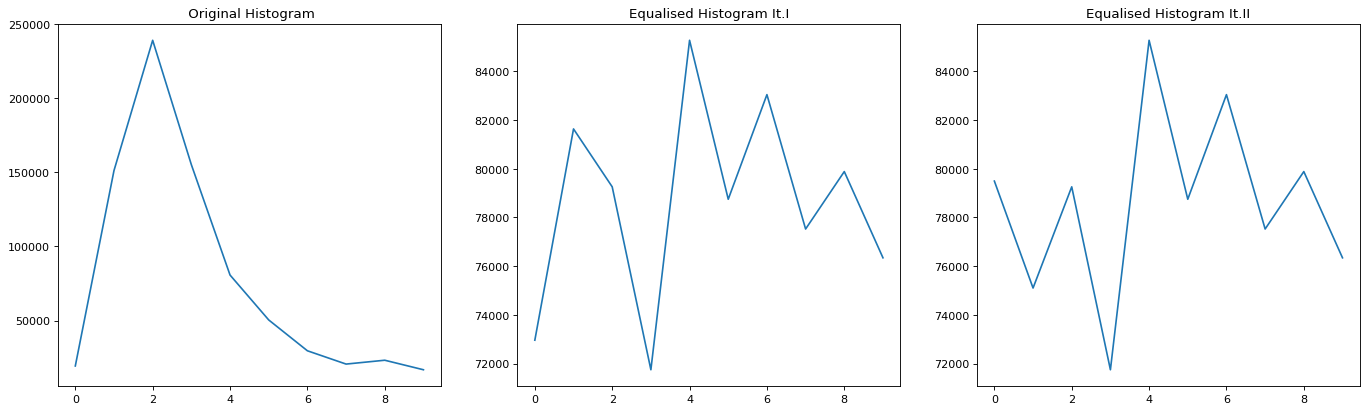

In [ ]:
figure(figsize=(21, 6), dpi=80)
plt.subplot(1,3,1),plt.plot(orig_hist), plt.title(' Original Histogram')
plt.subplot(1,3,2),plt.plot(hist_eq_1_plot),plt.title('Equalised Histogram It.I')
plt.subplot(1,3,3),plt.plot(hist_eq_2_plot),plt.title('Equalised Histogram It.II')

(<matplotlib.axes._subplots.AxesSubplot at 0x7ff18c6fbe10>,
 Text(0.5, 1.0, 'Hist Equalised Image II'))

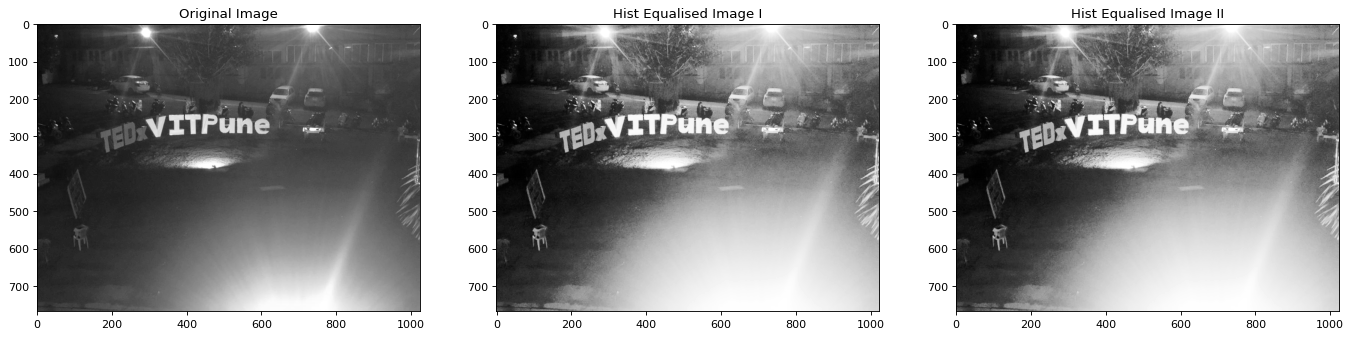

In [ ]:
figure(figsize=(21, 6), dpi=80)
plt.subplot(1,3,1),plt.imshow(img,'gray'), plt.title('Original Image')
plt.subplot(1,3,2),plt.imshow(hist_eq_1,'gray'),plt.title('Hist Equalised Image I')
plt.subplot(1,3,3),plt.imshow(hist_eq_2,'gray'),plt.title('Hist Equalised Image II')

**Histogram Matching**

Histogram Matching or Histogram Specification is a way to express or transform the histogram of an image wrt to the histogram of another reference image. In essence, this algorithm tries to redistribute the histogram of the "source image" in accordance to the distribution of "reference image".

Steps to be followed are:

a) Carry out Histogram Equalization for both the source and reference images

   i) For every pixel, calculate the pixel probabilities and the Cumulative Distribution Function (CDF) for these probabilities.

   ii) Multiply the value thus obtained with the upper limit of gray levels in the image and round off the resulting value to obtain the equalized datapoints.

b) We then try mapping the equalized datapoints of the source image with the new gray levels obtained from the reference image.